In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf 
import numpy as np
from datetime import datetime
pd.set_option('display.max_rows', 5000)

In [28]:
df = pd.read_csv(r'C:\Users\kentj\Desktop\8Props\Flat_resale_price\resale.csv')

C:\Users\kentj\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [29]:
 df.head() #checking dataframes

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,floor_area_sqf,unit_price_psf
0,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN,333.6809,26.971876
1,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN,333.6809,17.981251
2,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN,333.6809,23.975001
3,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN,333.6809,17.981251
4,1990-01-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN,785.7647,60.068873


In [30]:
df.info() #checking the data types 
#ideally month should be in a datetime format, 
#missing values in remaining_lease 
#ideally remaining_lease should also be int or float. Lets investigate

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845204 entries, 0 to 845203
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                845204 non-null  object 
 1   town                 845204 non-null  object 
 2   flat_type            845204 non-null  object 
 3   block                845204 non-null  object 
 4   street_name          845204 non-null  object 
 5   storey_range         845204 non-null  object 
 6   floor_area_sqm       845204 non-null  float64
 7   flat_model           845204 non-null  object 
 8   lease_commence_date  845204 non-null  int64  
 9   resale_price         845204 non-null  float64
 10  remaining_lease      136154 non-null  object 
 11  floor_area_sqf       845204 non-null  float64
 12  unit_price_psf       845204 non-null  float64
dtypes: float64(4), int64(1), object(8)
memory usage: 83.8+ MB


In [31]:
df['year'] = df['month'].str.split('-').apply(lambda x: x[0])
df['month_sold'] = df['month'].str.split('-').apply(lambda x: x[1])
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,floor_area_sqf,unit_price_psf,year,month_sold
0,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN,333.6809,26.971876,1990,01
1,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN,333.6809,17.981251,1990,01
2,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN,333.6809,23.975001,1990,01
3,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN,333.6809,17.981251,1990,01
4,1990-01-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN,785.7647,60.068873,1990,01


In [32]:
df['lease_commence_date'].value_counts()

1985    83068
1984    60131
1988    47923
1987    40547
1978    39195
1986    36594
1980    30475
1989    30439
1979    29357
1997    28749
1993    26525
1996    26282
1998    23619
1983    21914
1976    20336
1981    19777
1977    19700
1992    18935
1999    18819
1995    17766
2001    17163
2000    16473
1975    16415
1974    13800
2003    13679
1982    12624
2002    10997
1970    10797
1990     8775
1973     8167
1969     7980
1971     7541
2004     7330
2015     6304
1994     6118
1967     5833
1972     5498
2013     3834
2012     3612
2005     3417
2016     3027
2006     2656
2014     2320
2011     1978
1968     1791
2008     1744
2009     1433
1991     1171
2010     1075
2007      779
2017      671
1966       29
2018       12
2019       10
Name: lease_commence_date, dtype: int64

In [33]:
df['remaining_lease'].value_counts() , df.isnull().sum()
# too many null values in remaining_lease, will drop. b

(67                    1601
 68                    1458
 71                    1080
 84                     996
 83                     979
 80                     939
 70                     930
 95                     907
 81                     871
 68.0                   870
 85                     848
 69                     843
 79                     812
 61                     800
 86                     798
 69.0                   792
 82                     782
 94 years 09 months     749
 94 years 11 months     742
 94 years 10 months     728
 94 years 08 months     726
 60                     688
 94 years 07 months     669
 66                     661
 63                     647
 95 years 01 month      646
 62                     640
 94 years 05 months     630
 94 years 06 months     628
 95 years 02 months     621
 95 years               610
 94 years 04 months     608
 72                     599
 75                     592
 72.0                   591
 94 years 03 months 

In [35]:
df.drop(columns = 'remaining_lease', inplace = True )

In [37]:
df['month'] = pd.to_datetime(df['month']) #convert month into datetime64 

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845204 entries, 0 to 845203
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   month                845204 non-null  datetime64[ns]
 1   town                 845204 non-null  object        
 2   flat_type            845204 non-null  object        
 3   block                845204 non-null  object        
 4   street_name          845204 non-null  object        
 5   storey_range         845204 non-null  object        
 6   floor_area_sqm       845204 non-null  float64       
 7   flat_model           845204 non-null  object        
 8   lease_commence_date  845204 non-null  int64         
 9   resale_price         845204 non-null  float64       
 10  floor_area_sqf       845204 non-null  float64       
 11  unit_price_psf       845204 non-null  float64       
 12  year                 845204 non-null  object        
 13  month_sold    

In [42]:
df['year'] = df['year'].astype(int)

In [43]:
df['lease_year_left'] = 99 - (df['year'] - df['lease_commence_date']) #assume that lease year is 99 year for all hdbs
df.head() 

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,floor_area_sqf,unit_price_psf,year,month_sold,lease_year_left
0,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,333.6809,26.971876,1990,01,86
1,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,333.6809,17.981251,1990,01,86
2,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,333.6809,23.975001,1990,01,86
3,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,333.6809,17.981251,1990,01,86
4,1990-01-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,785.7647,60.068873,1990,01,85


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845204 entries, 0 to 845203
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   month                845204 non-null  datetime64[ns]
 1   town                 845204 non-null  object        
 2   flat_type            845204 non-null  object        
 3   block                845204 non-null  object        
 4   street_name          845204 non-null  object        
 5   storey_range         845204 non-null  object        
 6   floor_area_sqm       845204 non-null  float64       
 7   flat_model           845204 non-null  object        
 8   lease_commence_date  845204 non-null  int64         
 9   resale_price         845204 non-null  float64       
 10  floor_area_sqf       845204 non-null  float64       
 11  unit_price_psf       845204 non-null  float64       
 12  year                 845204 non-null  int32         
 13  month_sold    

In [47]:
df['storey_range'].value_counts() #data looks OK. no weird ranges. 

04 TO 06    213966
07 TO 09    192931
01 TO 03    172250
10 TO 12    163568
13 TO 15     54047
16 TO 18     20370
19 TO 21      9815
22 TO 24      6349
25 TO 27      2712
01 TO 05      2700
06 TO 10      2474
11 TO 15      1259
28 TO 30      1150
31 TO 33       333
34 TO 36       331
37 TO 39       317
16 TO 20       265
40 TO 42       157
21 TO 25        92
26 TO 30        39
43 TO 45        30
46 TO 48        29
49 TO 51        11
36 TO 40         7
31 TO 35         2
Name: storey_range, dtype: int64

In [50]:
df['storey1'] = df['storey_range'].str.split(' ').apply(lambda x: x[0]) #retrieving first element
df['storey2'] = df['storey_range'].str.split(' ').apply(lambda x: x[-1]) #retrieving the last element

df['storey1'] = df['storey1'].astype(int) #converting to int
df['storey2'] = df['storey2'].astype(int)

df['avg_storey'] = (df['storey1'] + df['storey2']) / 2 # getting average 
df['avg_storey'].astype(int)
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,floor_area_sqf,unit_price_psf,year,month_sold,lease_year_left,storey1,storey2,avg_storey
0,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,333.6809,26.971876,1990,01,86,10,12,11.0
1,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,333.6809,17.981251,1990,01,86,4,6,5.0
2,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,333.6809,23.975001,1990,01,86,10,12,11.0
3,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,333.6809,17.981251,1990,01,86,7,9,8.0
4,1990-01-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,785.7647,60.068873,1990,01,85,4,6,5.0


# Exploratory Data Analysis
## Question 1:
1. What is the relationship between the lease left on the housing resale price in the last 5 years? 
1.1 Do the following filters where town = bukit panjang, central area, yishun, or hougang 

2. which town is the most expensive town in the last 5 years, base on median values? 

3. Do a scatter plot, to look at the relationship of storey_range against the unit price psf (Does high level equate to higher prices?) 


In [51]:
#What is the relationship between the lease left on the housing resale price in the last 5 years? 
cond1 = (df['month'] >= "2016-06-01") & (df['month'] <= "2021-05-01") 
cond2 = df['town'] == 'QUEENSTOWN'
cond3 = df['town'] == 'CENTRAL AREA'
cond4 = df['town'] == 'YISHUN'
cond5 = df['town'] == 'BUKIT TIMAH'

df2 = df[cond1]

df3 = df2[cond2 | cond3 | cond4 | cond5]

<ipython-input-51-8785cddc3bd6>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df3 = df2[cond2 | cond3 | cond4 | cond5]


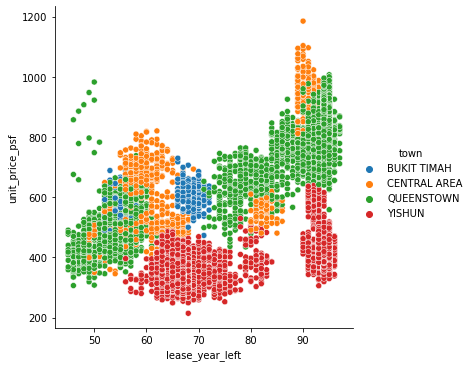

In [57]:
sns.relplot(x = 'lease_year_left', y ='unit_price_psf', data = df3, hue = 'town')
#overall, we still see a postive relationship between the number of lease years and unit_price_psf.
#The effect is especially huge for Central Areas, as compared to the other 3 towns 

<AxesSubplot:xlabel='lease_year_left', ylabel='resale_price'>

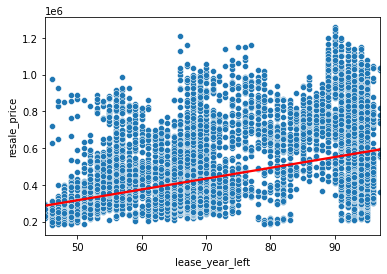

In [59]:
ax = sns.scatterplot(data=df3, x="lease_year_left", y='resale_price')
sns.regplot(data=df3, x="lease_year_left", y='resale_price', scatter=False, ax=ax, color = 'red')

In [60]:
most_popular_town = df2.groupby('town').count().reset_index().sort_values(by = 'unit_price_psf', ascending = False)

In [61]:
most_popular_town

,town,month,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,floor_area_sqf,unit_price_psf,year,month_sold,lease_year_left,storey1,storey2,avg_storey
20,SENGKANG,9043,9043,9043,9043,9043,9043,9043,9043,9043,9043,9043,9043,9043,9043,9043,9043,9043
13,JURONG WEST,7841,7841,7841,7841,7841,7841,7841,7841,7841,7841,7841,7841,7841,7841,7841,7841,7841
24,WOODLANDS,7781,7781,7781,7781,7781,7781,7781,7781,7781,7781,7781,7781,7781,7781,7781,7781,7781
17,PUNGGOL,7433,7433,7433,7433,7433,7433,7433,7433,7433,7433,7433,7433,7433,7433,7433,7433,7433
22,TAMPINES,7398,7398,7398,7398,7398,7398,7398,7398,7398,7398,7398,7398,7398,7398,7398,7398,7398
25,YISHUN,7348,7348,7348,7348,7348,7348,7348,7348,7348,7348,7348,7348,7348,7348,7348,7348,7348
1,BEDOK,6146,6146,6146,6146,6146,6146,6146,6146,6146,6146,6146,6146,6146,6146,6146,6146,6146
11,HOUGANG,5428,5428,5428,5428,5428,5428,5428,5428,5428,5428,5428,5428,5428,5428,5428,5428,5428
0,ANG MO KIO,4919,4919,4919,4919,4919,4919,4919,4919,4919,4919,4919,4919,4919,4919,4919,4919,4919
8,CHOA CHU KANG,4717,4717,4717,4717,4717,4717,4717,4717,4717,4717,4717,4717,4717,4717,4717,4717,4717


Text(0.5, 0, 'Total Transaction')

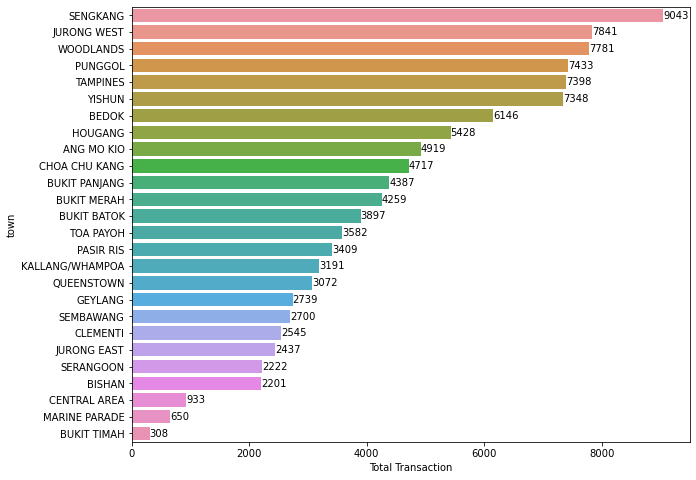

In [62]:
fig, ax = plt.subplots(1, figsize = (10,8))
sns.barplot(x='unit_price_psf', y = 'town', data = most_popular_town)

for p in ax.patches:
    width = p.get_width()   
    ax.text(width + 1,       
            p.get_y() + p.get_height() / 2, 
            '{:1.0f}'.format(width), 
            ha = 'left',  
            va = 'center')
    
plt.xlabel("Total Transaction", size = 10)

In [63]:
#2. which town is the most expensive town in the last 5 years, base on median and maximum values? 
most_exp_town_median = df2.groupby('town')[['unit_price_psf']].median().reset_index().sort_values(by = 'unit_price_psf', ascending = False)
#in the past 5 years, Central Area, Queenstown and Bukit Timah has the most expensive median prices 
#in the past 5 years, Sembawang, Woodlands and Choa Chu Kang has the least expensive resale median prices. 

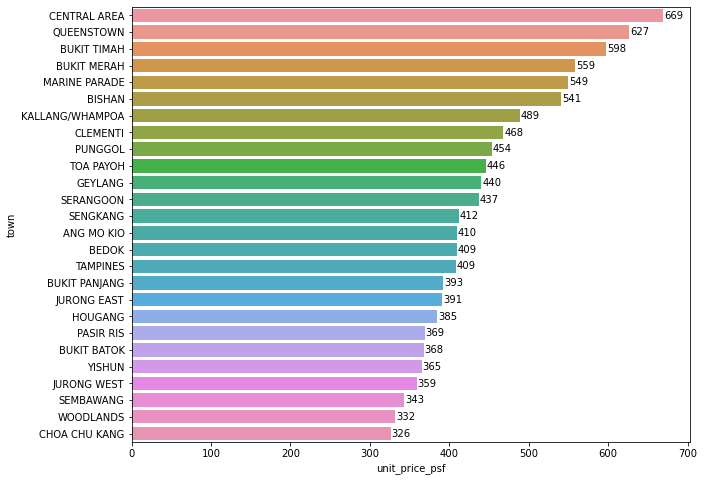

In [64]:
fig, ax = plt.subplots(1, figsize = (10,8))
sns.barplot(x='unit_price_psf', y = 'town', data = most_exp_town_median)

for p in ax.patches:
    width = p.get_width()   
    ax.text(width + 1,       
            p.get_y() + p.get_height() / 2, 
            '{:1.0f}'.format(width), 
            ha = 'left',  
            va = 'center')

In [65]:
df2.groupby('town')[['unit_price_psf']].max().reset_index().sort_values(by = 'unit_price_psf', ascending = False)
#in the past 5 years, Central Area, Bukit Merah and QueensTown has the most highest max prices 
#in the past 5 years, Jurong East, Choa Chu Kang and Woodlands has the least resale max prices.

,town,unit_price_psf
7,CENTRAL AREA,1185.651721
4,BUKIT MERAH,1090.862558
18,QUEENSTOWN,1007.383336
2,BISHAN,967.740937
23,TOA PAYOH,945.330094
14,KALLANG/WHAMPOA,940.941957
9,CLEMENTI,919.353890
1,BEDOK,811.567572
0,ANG MO KIO,801.416089
16,PASIR RIS,800.396196


In [15]:
#3. Do a scatter plot, to look at the relationship of storey_range against the unit price psf in Central Area in the past 5 years (Does high storey equate to higher prices?)
df.info()
#storey_range is now an object, which ideally, if possible, we would like it to be a number. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845204 entries, 0 to 845203
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   month                845204 non-null  datetime64[ns]
 1   town                 845204 non-null  object        
 2   flat_type            845204 non-null  object        
 3   block                845204 non-null  object        
 4   street_name          845204 non-null  object        
 5   storey_range         845204 non-null  object        
 6   floor_area_sqm       845204 non-null  float64       
 7   flat_model           845204 non-null  object        
 8   lease_commence_date  845204 non-null  int64         
 9   resale_price         845204 non-null  float64       
 10  remaining_lease      136154 non-null  object        
 11  floor_area_sqf       845204 non-null  float64       
 12  unit_price_psf       845204 non-null  float64       
 13  lease_year_lef

In [68]:
mask = (df['town'] == 'BUKIT PANJANG') | (df['town'] == 'SEMBAWANG') | (df['town'] == 'BISHAN') | (df['town'] == 'CENTRAL AREA')
mask1 = df['town'] == 'CLEMENTI'
df4 = df[mask] # masking operation 

#we will use mask for clearer view. Mask1 is there for convenience. 

In [17]:
df4.count()

month                  10221
town                   10221
flat_type              10221
block                  10221
street_name            10221
storey_range           10221
floor_area_sqm         10221
flat_model             10221
lease_commence_date    10221
resale_price           10221
remaining_lease        10221
floor_area_sqf         10221
unit_price_psf         10221
lease_year_left        10221
dtype: int64

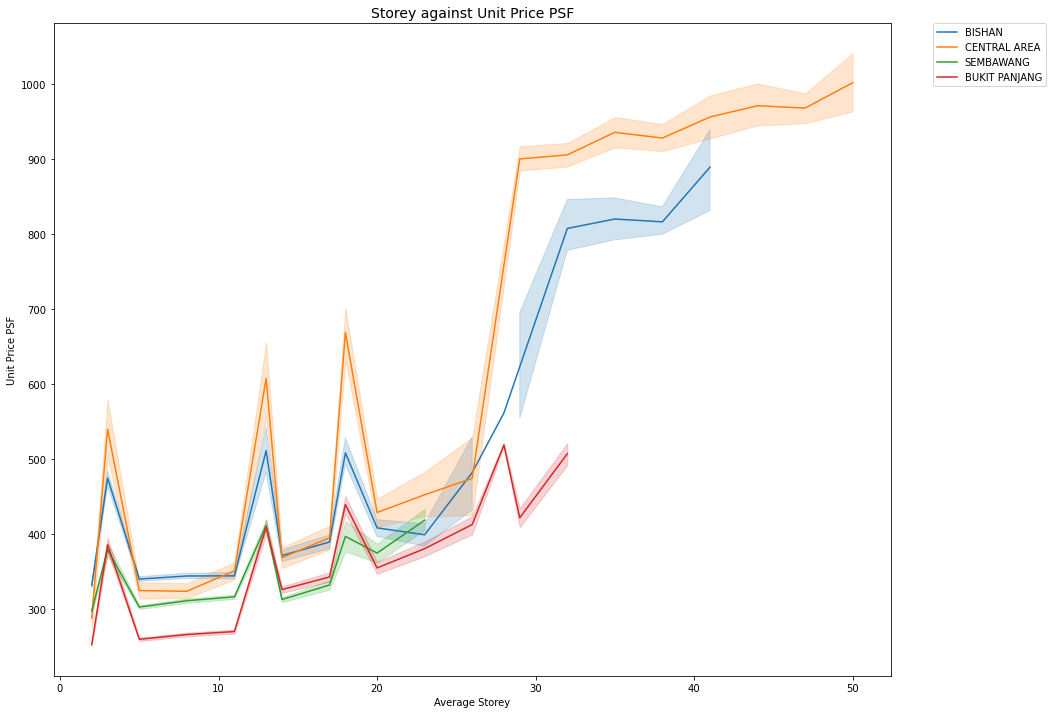

In [69]:
fig, ax = plt.subplots(1, figsize = (15,12))
sns.lineplot(x = 'avg_storey', y = 'unit_price_psf', data = df4, hue = 'town')

plt.xlabel("Average Storey", size = 10)
plt. ylabel("Unit Price PSF", size = 10)
plt.title("Storey against Unit Price PSF", size = 14)
plt.legend()
#plt.xticks(rotation = 45)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#central areas have the highest gradient, as comparable to other towns. 

Text(0.5, 1.0, 'Storey against Unit Price PSF')

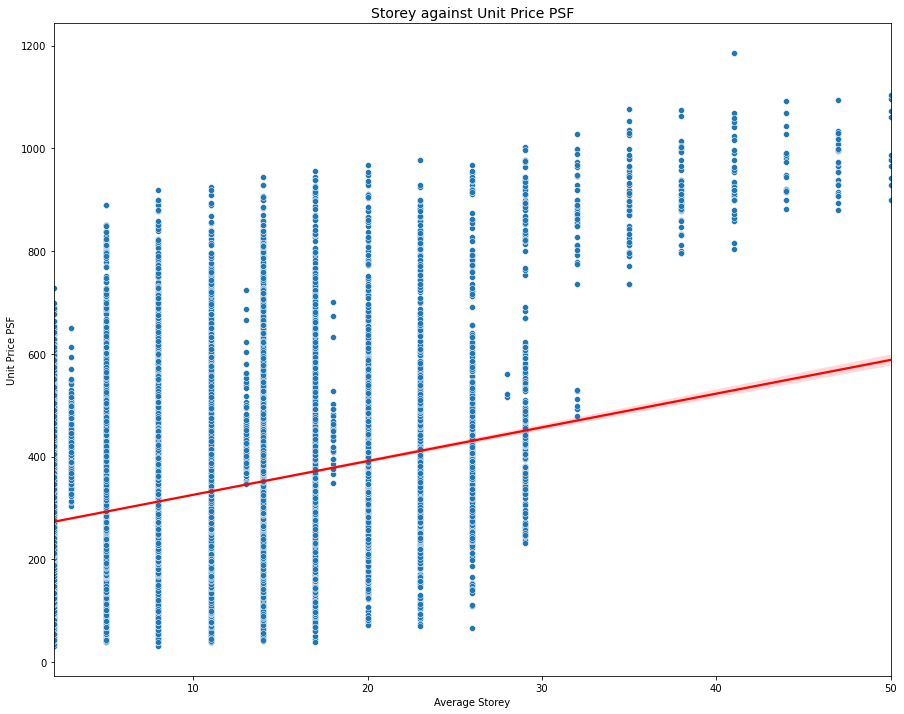

In [77]:
fig, ax = plt.subplots(1, figsize = (15,12))
ax = sns.scatterplot(data=df4, x = 'avg_storey', y = 'unit_price_psf')
sns.regplot(data=df4, x = 'avg_storey', y = 'unit_price_psf', scatter=False, ax=ax, color = 'red')

plt.xlabel("Average Storey", size = 10)
plt. ylabel("Unit Price PSF", size = 10)
plt.title("Storey against Unit Price PSF", size = 14)
#plt.legend()
#plt.xticks(rotation = 45)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#central areas have the highest gradient, as comparable to other towns. 

# Question 2
1. which flat model was the most popular in the last 5 years? 
2. which flat model was the most expensive? 
3. Does bigger room types equate to higher unit_price_psf? 

In [78]:
df2.groupby('flat_model')[['unit_price_psf']].count().sort_values(by= 'unit_price_psf', ascending = False)
#Model A is the most popular 


,unit_price_psf
flat_model,
Model A,35930
Improved,27709
New Generation,15093
Premium Apartment,12149
Simplified,4558
Apartment,4463
Maisonette,3290
Standard,3161
DBSS,1928


In [79]:
#2. which flat model was the most expensive?
df2.groupby('flat_model')[['unit_price_psf']].median().reset_index().sort_values(by = 'unit_price_psf', ascending = False)
#Type S1 is the most expensive. 

,flat_model,unit_price_psf
18,Type S1,909.368711
19,Type S2,906.780254
13,Premium Apartment Loft,833.254876
17,Terrace,750.450838
3,DBSS,708.968490
5,Improved-Maisonette,474.009400
8,Model A-Maisonette,469.825483
0,2-room,458.521206
10,Multi Generation,436.191525
1,Adjoined flat,435.930071


In [80]:
# 3. Does bigger room types equate to higher unit_price_psf? 
#we will use the past 5 years of transactions as our analysis. thus using df2. 
#but first, we will check the column for flat_type 
df5 = df2.groupby('flat_type')[['unit_price_psf']].count().reset_index()
df5

,flat_type,unit_price_psf
0,1 ROOM,48
1,2 ROOM,1629
2,3 ROOM,26460
3,4 ROOM,45890
4,5 ROOM,27703
5,EXECUTIVE,8805
6,MULTI-GENERATION,51


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '1 ROOM'),
  Text(1, 0, '2 ROOM'),
  Text(2, 0, '3 ROOM'),
  Text(3, 0, '4 ROOM'),
  Text(4, 0, '5 ROOM'),
  Text(5, 0, 'EXECUTIVE'),
  Text(6, 0, 'MULTI-GENERATION')])

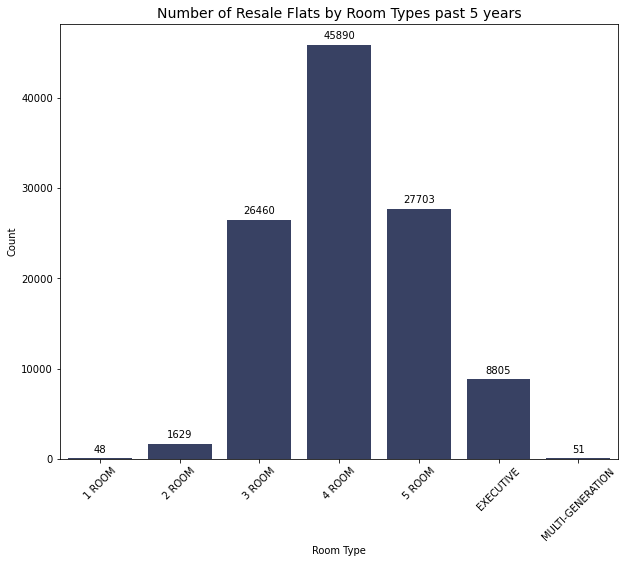

In [81]:
#which is the most popular flat_type in the past 5 years? 
fig, ax = plt.subplots(1, figsize = (10,8))

bplot = sns.barplot(x='flat_type', y = "unit_price_psf", data = df5, color = '#313D6A')

for p in bplot.patches:
   bplot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                  textcoords = 'offset points')

plt.xlabel("Room Type", size = 10)
plt. ylabel("Count", size = 10)
plt.title("Number of Resale Flats by Room Types past 5 years", size = 14)
#plt.legend()
plt.xticks(rotation = 45)

#Within the past 5 years, 4 room flats have the highest transaction records!

In [82]:
#now we will look at the price according to the room types 
df6 = df2.groupby('flat_type')[['unit_price_psf']].median().reset_index().sort_values(by = 'unit_price_psf', ascending = False)
df6



,flat_type,unit_price_psf
0,1 ROOM,546.929716
1,2 ROOM,474.398961
6,MULTI-GENERATION,436.191525
2,3 ROOM,406.277867
3,4 ROOM,402.580230
5,EXECUTIVE,395.929446
4,5 ROOM,388.095333


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '1 ROOM'),
  Text(1, 0, '2 ROOM'),
  Text(2, 0, 'MULTI-GENERATION'),
  Text(3, 0, '3 ROOM'),
  Text(4, 0, '4 ROOM'),
  Text(5, 0, 'EXECUTIVE'),
  Text(6, 0, '5 ROOM')])

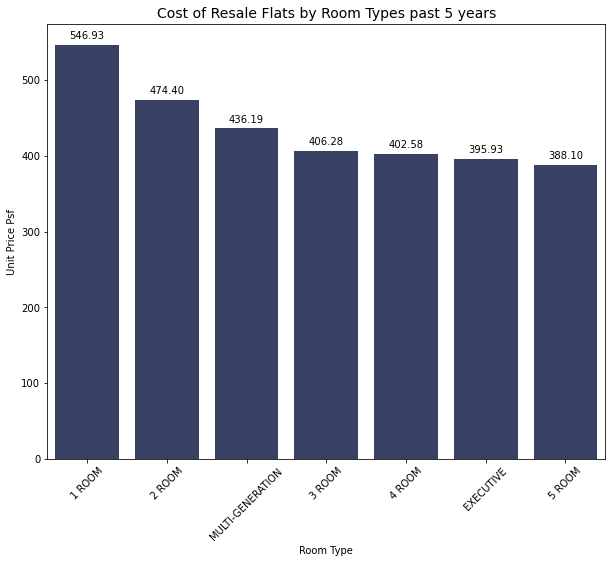

In [83]:
fig, ax = plt.subplots(1, figsize = (10,8))

bplot = sns.barplot(x='flat_type', y = "unit_price_psf", data = df6, color = '#313D6A')

for p in bplot.patches:
   bplot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                  textcoords = 'offset points')

plt.xlabel("Room Type", size = 10)
plt. ylabel("Unit Price Psf", size = 10)
plt.title("Cost of Resale Flats by Room Types past 5 years", size = 14)
#plt.legend()
plt.xticks(rotation = 45)


<AxesSubplot:xlabel='floor_area_sqf', ylabel='unit_price_psf'>

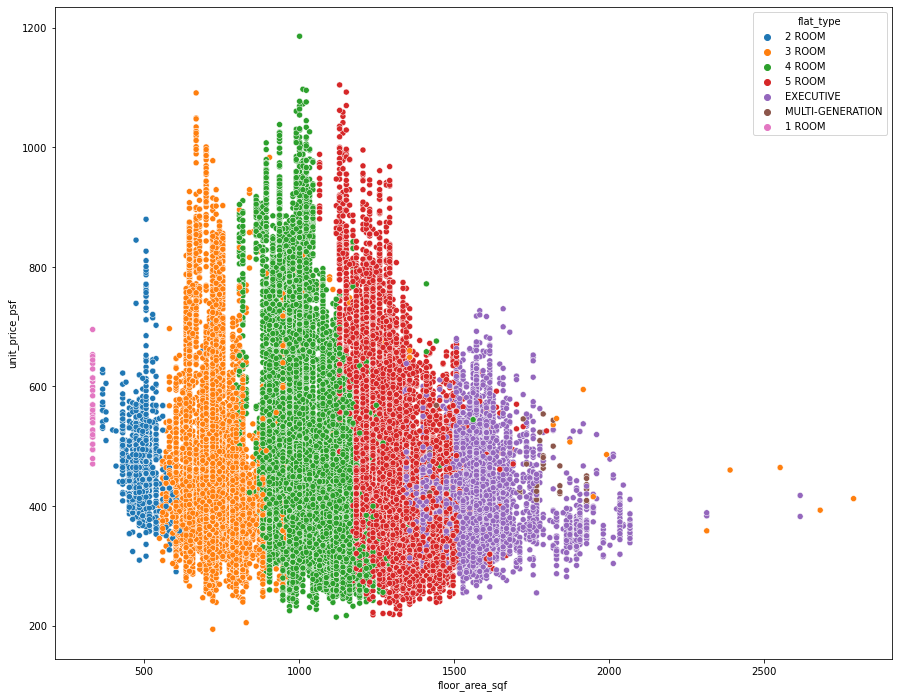

In [88]:
fig, ax = plt.subplots(1, figsize = (15,12))
sns.scatterplot(x ='floor_area_sqf', y ='unit_price_psf', data = df2, hue = 'flat_type')

<AxesSubplot:xlabel='flat_type', ylabel='unit_price_psf'>

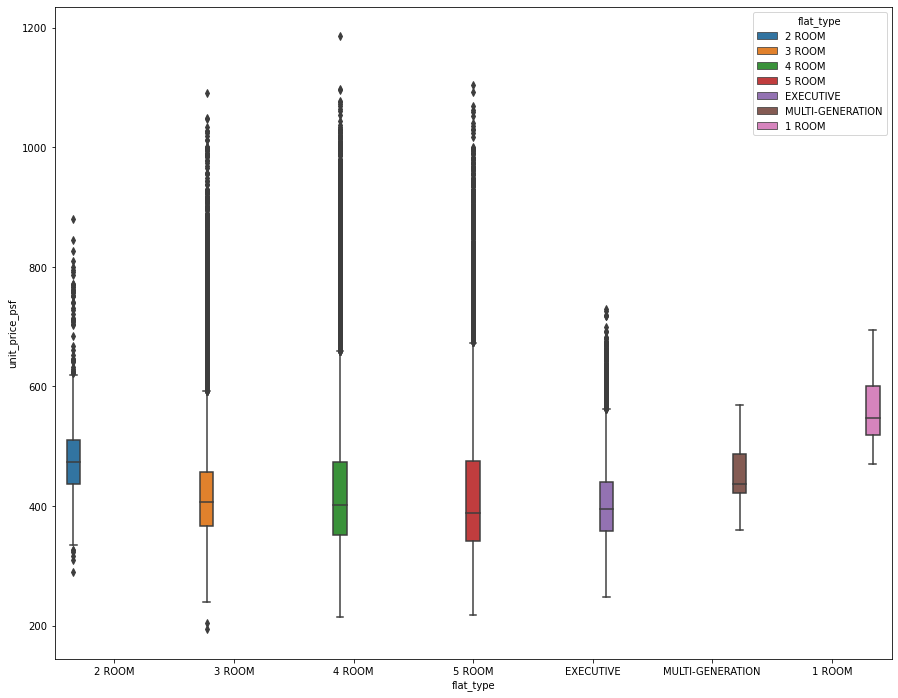

In [89]:
fig, ax = plt.subplots(1, figsize = (15,12))
sns.boxplot(x ='flat_type', y ='unit_price_psf', data = df2, hue = 'flat_type')

It is interesting to note, that on the contray, larger room types do not seem to have a higher unit_price_psf, in fact, it is an inverse relationship. 

In [93]:
df.to_csv(r'C:\Users\kentj\Desktop\8Props\Flat_resale_price\resale(EDA).csv', index = False)